##Twitter Archiver:  Retweets and Favorites versus Followers

Here, our aim will be to graph retweets and favorites of tweets versus the number of followers of the users who posted those tweets.

First, we'll perform some Jupyter magic to make our graph live inside the Jupyter window.

In [106]:
%matplotlib inline

Next, we import pandas for CSV reading, pyplot for graphing, patches for labeling, and numpy for some math.

Then, we set the plot style to something pretty.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.style.use('ggplot')

Read the tweets CSV

In [108]:
tweets_csv = pd.read_csv("Tweets.csv", header = True, encoding = "latin1")

Convert it to a python dictionary

In [109]:
tweets_dict = tweets_csv.to_dict()

Make lists of number of followers, number of retweets, and number of favorites

In [110]:
followers = [value for key, value in tweets_dict["Followers"].items()]

In [111]:
retweets = [value for key, value in tweets_dict["Retweets"].items()]

In [112]:
favorites = [value for key, value in tweets_dict["Favorites"].items()]

Let's walk through the code step-by-step:

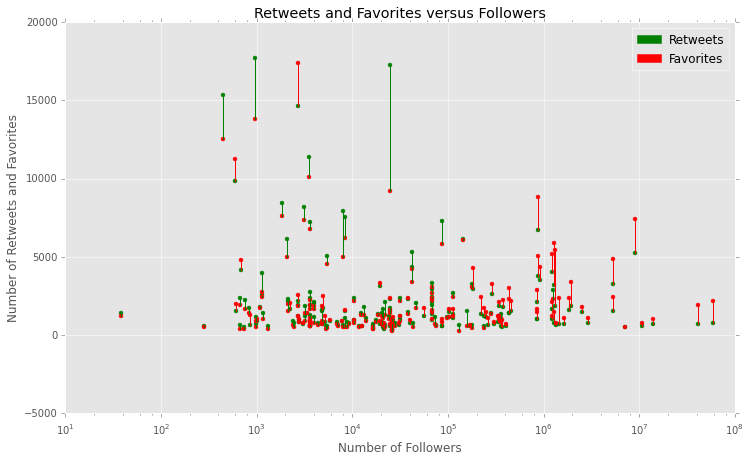

In [117]:
#First, we set the size of the graph.
plt.figure(figsize=(12, 7))
#Then we draw scatter plots of followers versus retweets and followers versus favorites.
plt.scatter(followers, retweets, color='g', s=15, marker='o')
plt.scatter(followers, favorites, color='r', s=15, marker='o')
#Then we draw lines connecting the retweet nodes and favorite nodes.
for retweet, favorite, follower in list(zip(retweets, favorites, followers)):
    if retweet > favorite:
        plt.plot([follower, follower], [retweet, favorite], "g")
    else:
        plt.plot([follower, follower], [retweet, favorite], "r")
#We label the axes and give the graph a title.
plt.xlabel('Number of Followers')
plt.ylabel('Number of Retweets and Favorites')
plt.title('Retweets and Favorites versus Followers')
#We create a legend.
retweets_patch = mpatches.Patch(color='green', label='Retweets')
favorites_patch = mpatches.Patch(color='red', label='Favorites')
plt.legend(handles=[retweets_patch, favorites_patch])
#We change the scale of the x-axis to be logarithmic.
plt.xscale("log")
#Finally, we show the plot.
plt.show()